In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Data Loading
df = pd.read_csv('dataset/train.txt', sep=' ', header=None)

In [20]:
df

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,8120.83,8.6216,0.03,368,2319,100.00,28.58,17.1735,NaN,NaN
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,8132.87,8.3907,0.03,391,2388,100.00,38.99,23.3619,NaN,NaN
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,8063.84,9.3557,0.02,334,2223,100.00,14.83,8.8555,NaN,NaN
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,8052.30,9.2231,0.02,364,2324,100.00,24.42,14.7832,NaN,NaN
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,8083.67,9.2986,0.02,330,2212,100.00,10.99,6.4025,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45913,218,129,42.0066,0.8400,40.0,445.00,551.02,1365.27,1147.43,3.91,...,8062.87,9.4672,0.02,333,2212,100.00,10.57,6.2985,NaN,NaN
45914,218,130,42.0029,0.8415,40.0,445.00,550.07,1365.55,1142.21,3.91,...,8062.05,9.4619,0.02,332,2212,100.00,10.40,6.2741,NaN,NaN
45915,218,131,41.9999,0.8400,40.0,445.00,549.92,1359.21,1150.15,3.91,...,8062.73,9.4827,0.02,334,2212,100.00,10.37,6.1978,NaN,NaN
45916,218,132,35.0007,0.8419,60.0,449.44,556.55,1380.05,1145.49,5.48,...,8043.21,9.4212,0.02,337,2223,100.00,14.70,8.6761,NaN,NaN


In [21]:
# Check for NaN in each column
print("Number of missing values in each column:")
print(df.isnull().sum())

Количество пропущенных значений в каждом столбце:
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26    45918
27    45918
dtype: int64


In [22]:
# Remove columns with missing values
df.dropna(axis=1, inplace=True)  

In [23]:
# Assign column names based on the description
columns = ['unit_number', 'time_in_cycles'] 
columns += ['op_setting_1', 'op_setting_2', 'op_setting_3'] 
sensor_cols = ['sensor_measurement_{}'.format(i) for i in range(1, 22)] 

columns += sensor_cols

# Assign names to columns
df.columns = columns 

In [24]:
# Basic information about the data
print("Basic information about the data:")
print(df.info())

Основная информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45918 entries, 0 to 45917
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   unit_number            45918 non-null  int64  
 1   time_in_cycles         45918 non-null  int64  
 2   op_setting_1           45918 non-null  float64
 3   op_setting_2           45918 non-null  float64
 4   op_setting_3           45918 non-null  float64
 5   sensor_measurement_1   45918 non-null  float64
 6   sensor_measurement_2   45918 non-null  float64
 7   sensor_measurement_3   45918 non-null  float64
 8   sensor_measurement_4   45918 non-null  float64
 9   sensor_measurement_5   45918 non-null  float64
 10  sensor_measurement_6   45918 non-null  float64
 11  sensor_measurement_7   45918 non-null  float64
 12  sensor_measurement_8   45918 non-null  float64
 13  sensor_measurement_9   45918 non-null  float64
 14  sensor_measurement_10  4

In [25]:
# Function to plot the correlation matrix
def plot_correlation_matrix(df, sensor_cols):
    plt.figure(figsize=(12, 10))
    corr_matrix = df[sensor_cols].corr()
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Sensor Measurements')
    plt.show()

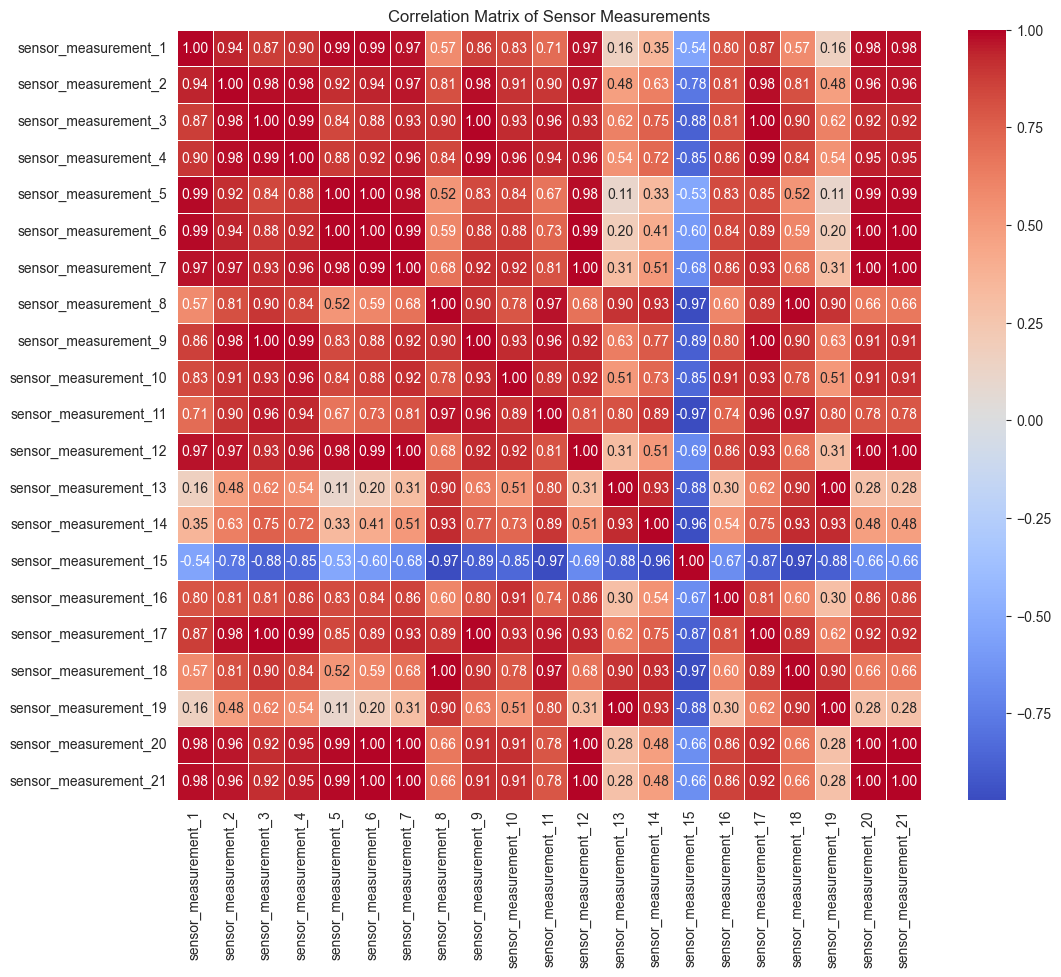

In [26]:
# Visualize the correlation matrix of sensors
plot_correlation_matrix(df, sensor_cols)

The correlation matrix shows high correlation among most sensors. Some sensors have correlation coefficients close to 1, indicating strong dependence.

For example, `sensor_measurement_1`, `sensor_measurement_2`, and `sensor_measurement_3` are almost identical, which is confirmed by their correlation around 0.99-1. This suggests that data from these sensors duplicate each other or measure similar parameters.

In [27]:
# Statistical description of sensor_measurement_11
print("Statistical description of sensor_measurement_11:")
print(df['sensor_measurement_11'].describe())

Статистическое описание sensor_measurement_11:
count    45918.000000
mean        42.991879
std          3.243475
min         36.210000
25%         41.930000
50%         42.390000
75%         45.380000
max         48.390000
Name: sensor_measurement_11, dtype: float64


In [28]:
# Check standard deviation of sensors
sensor_std = df[sensor_cols].std()
print("Standard deviation of sensors:")
print(sensor_std.sort_values())

Стандартное отклонение сенсоров:
sensor_measurement_16      0.004722
sensor_measurement_10      0.127832
sensor_measurement_15      0.751834
sensor_measurement_11      3.243475
sensor_measurement_5       3.627125
sensor_measurement_19      5.378969
sensor_measurement_6       5.451857
sensor_measurement_21      5.941954
sensor_measurement_20      9.903697
sensor_measurement_1      26.460179
sensor_measurement_17     27.837602
sensor_measurement_2      37.391068
sensor_measurement_14     84.964099
sensor_measurement_3     106.286960
sensor_measurement_4     119.550936
sensor_measurement_13    128.426495
sensor_measurement_12    138.163656
sensor_measurement_8     145.582047
sensor_measurement_18    145.693883
sensor_measurement_7     146.539301
sensor_measurement_9     336.780672
dtype: float64


Sensors with the lowest variability are `sensor_measurement_12` and `sensor_measurement_6`, indicating that their values are almost constant.

The highest standard deviations are in `sensor_measurement_5` and `sensor_measurement_9`, which may indicate a wide operating range of these sensors or the presence of outliers.

In [29]:
# Find the maximum number of cycles for each engine
rul = df.groupby('unit_number')['time_in_cycles'].max().reset_index()
rul.columns = ['unit_number', 'max_cycle']

# Calculate RUL for each time point
df = df.merge(rul, on='unit_number', how='left')
df['RUL'] = df['max_cycle'] - df['time_in_cycles']
df.drop('max_cycle', axis=1, inplace=True)

def plotSensorDataOfId(data, mcId):
    """
    Function to display sensor data for a specific engine.
    
    Parameters:
    - data: DataFrame containing data of all engines
    - mcId: Engine ID for which the data is displayed
    """
    plt.figure(figsize=(30, 20))
    
    # Iterate over all sensors
    for i in range(21):
        sensor = 'sensor_measurement_' + str(i + 1)
        
        # Create subplots for each sensor
        plt.subplot(10, 3, i + 1).set_title(sensor)
        
        # Data for the selected engine
        ssdata = data[data['unit_number'] == mcId]
        
        # Plot sensor readings over cycles
        plt.plot(ssdata['time_in_cycles'], ssdata[sensor])
    
    plt.tight_layout()
    plt.show()

def plotDataDistribution(data, sensor_c):
    """
    Visualizes the distribution of sensor values.
    
    Parameters:
    - data: DataFrame with data
    - sensor_c: list of sensor columns
    """
    plt.figure(figsize=(30, 10))
    for i, sensor in enumerate(sensor_c):
        plt.subplot(3, 10, i + 1)
        sns.histplot(data[sensor], kde=True)
        plt.title(sensor)
    plt.tight_layout()
    plt.show()

def plotAverageSensorData(data):
    """
    Function to display the average values of sensors across all engines.
    
    Parameters:
    - data: DataFrame containing data of all engines
    """
    plt.figure(figsize=(30, 20))
    
    # Iterate over all sensors
    for i in range(21):
        sensor = 'sensor_measurement_' + str(i + 1)
        
        # Create subplots for each sensor
        plt.subplot(10, 3, i + 1).set_title(sensor)
        
        # Calculate average sensor value for each time cycle
        mean_sensor_data = data.groupby('time_in_cycles')[sensor].mean()
        
        # Plot average sensor readings over time
        plt.plot(mean_sensor_data.index, mean_sensor_data.values)
    
    plt.tight_layout()
    plt.show()

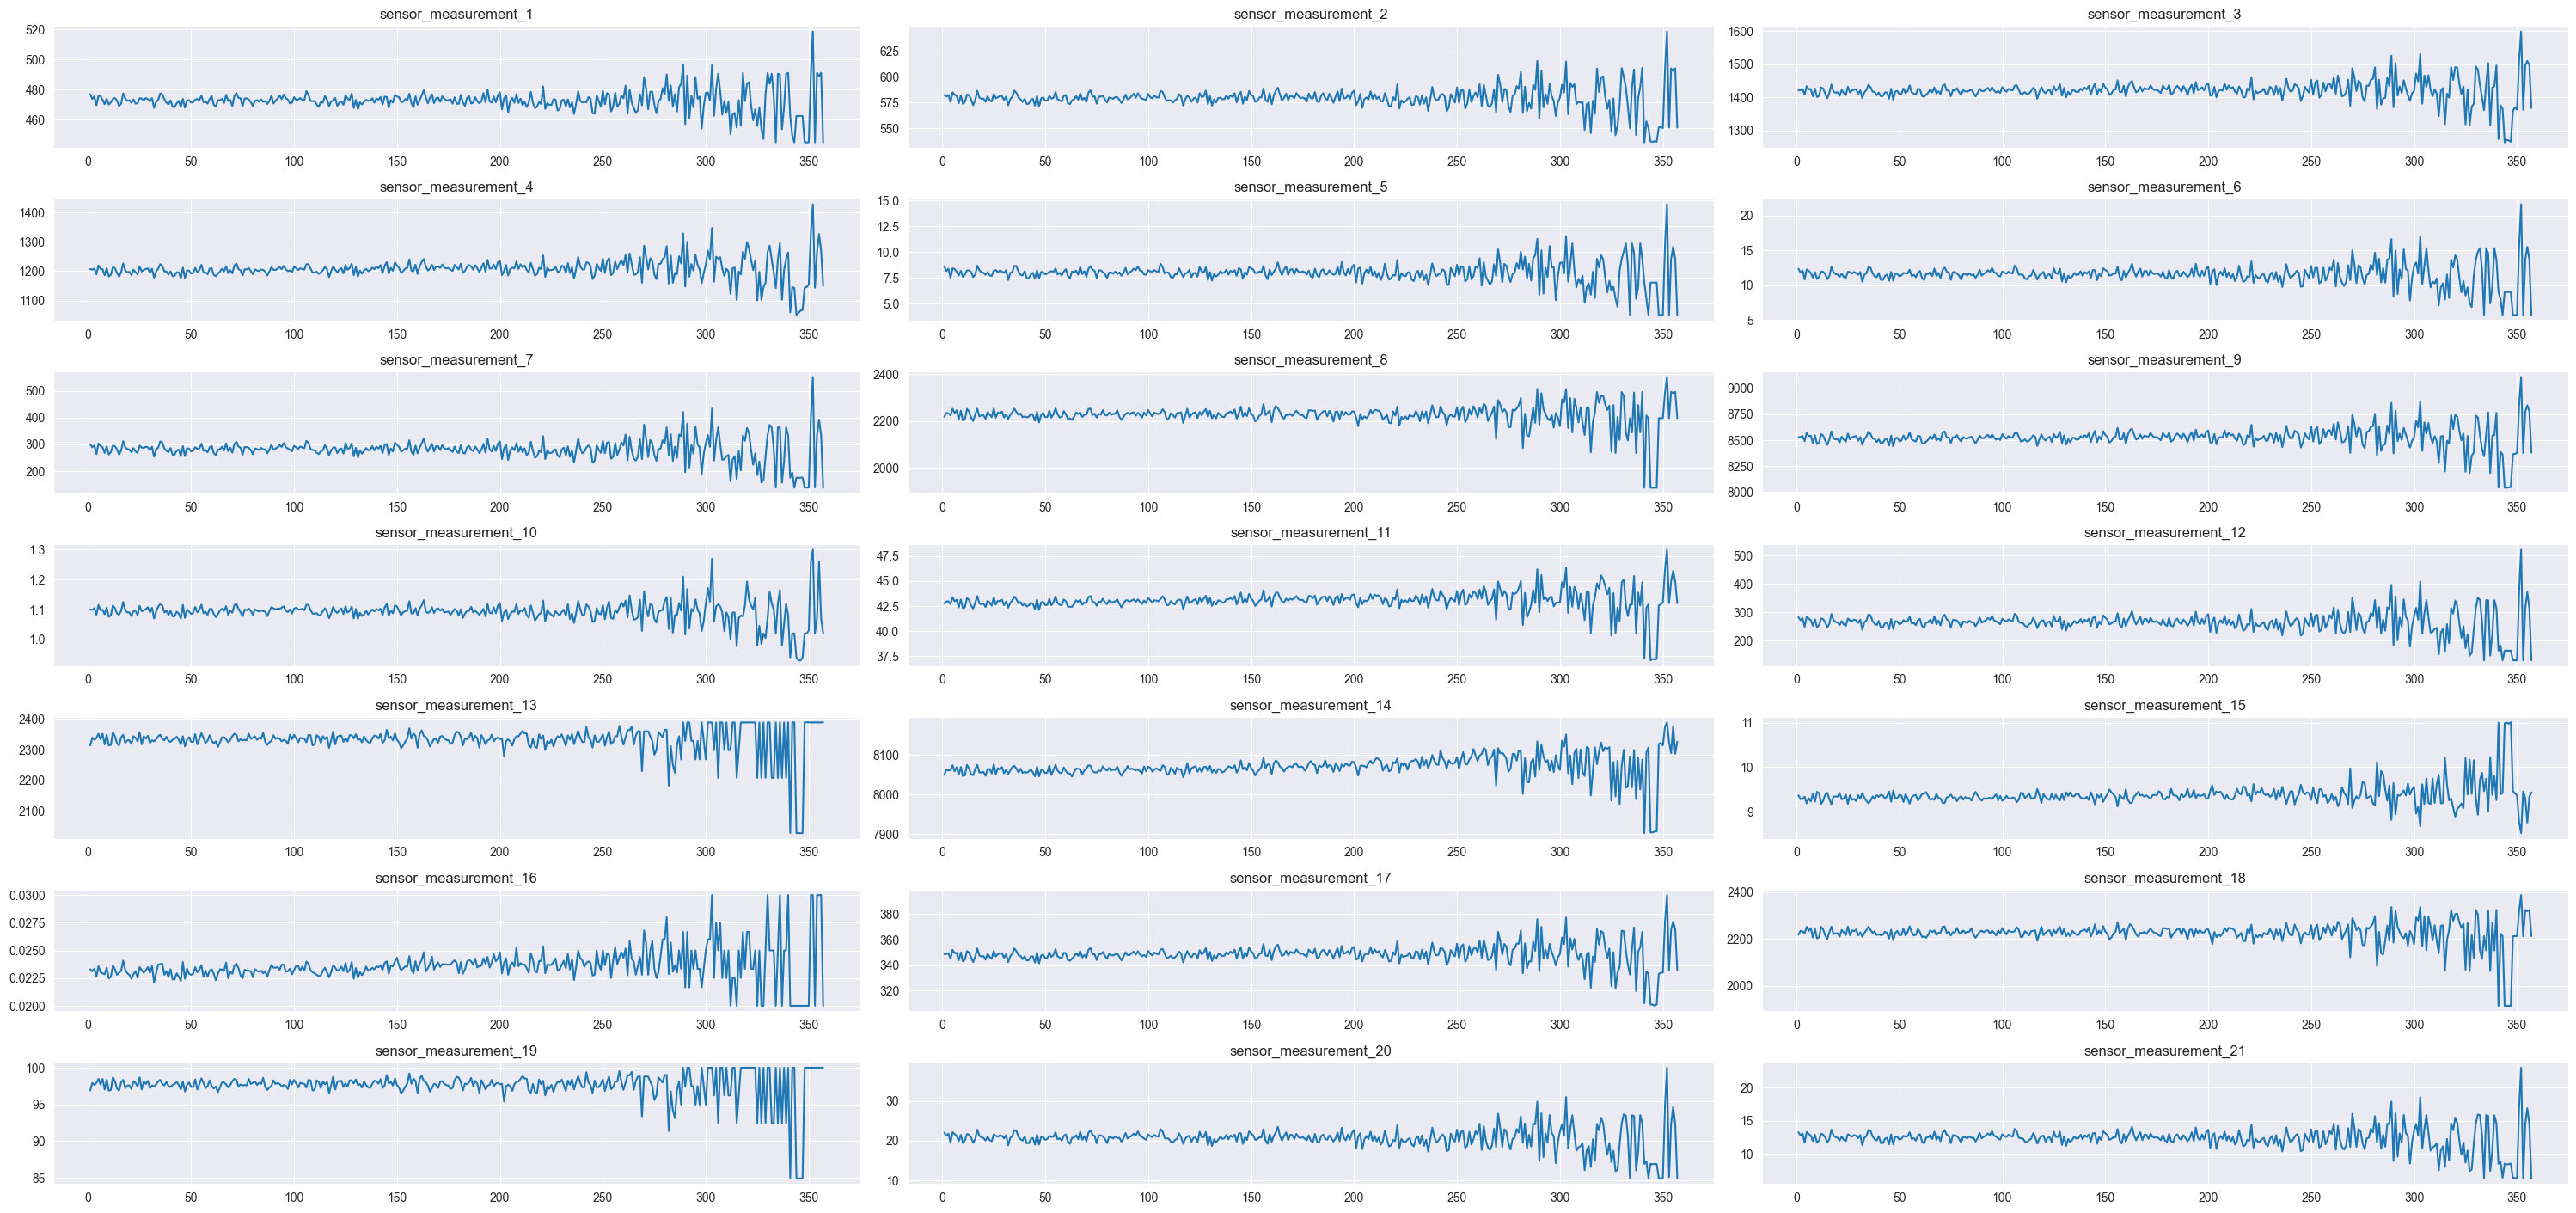

In [30]:
plotAverageSensorData(df)

Some sensors, such as `sensor_measurement_1`, `sensor_measurement_13`, `sensor_measurement_16`, and `sensor_measurement_19`, have almost constant or discrete values over the entire time interval, which may indicate low informativeness of these data.

Conversely, other sensors like `sensor_measurement_2`, `sensor_measurement_3`, and `sensor_measurement_4` show significant fluctuations and are likely to contain more useful information for predicting RUL.

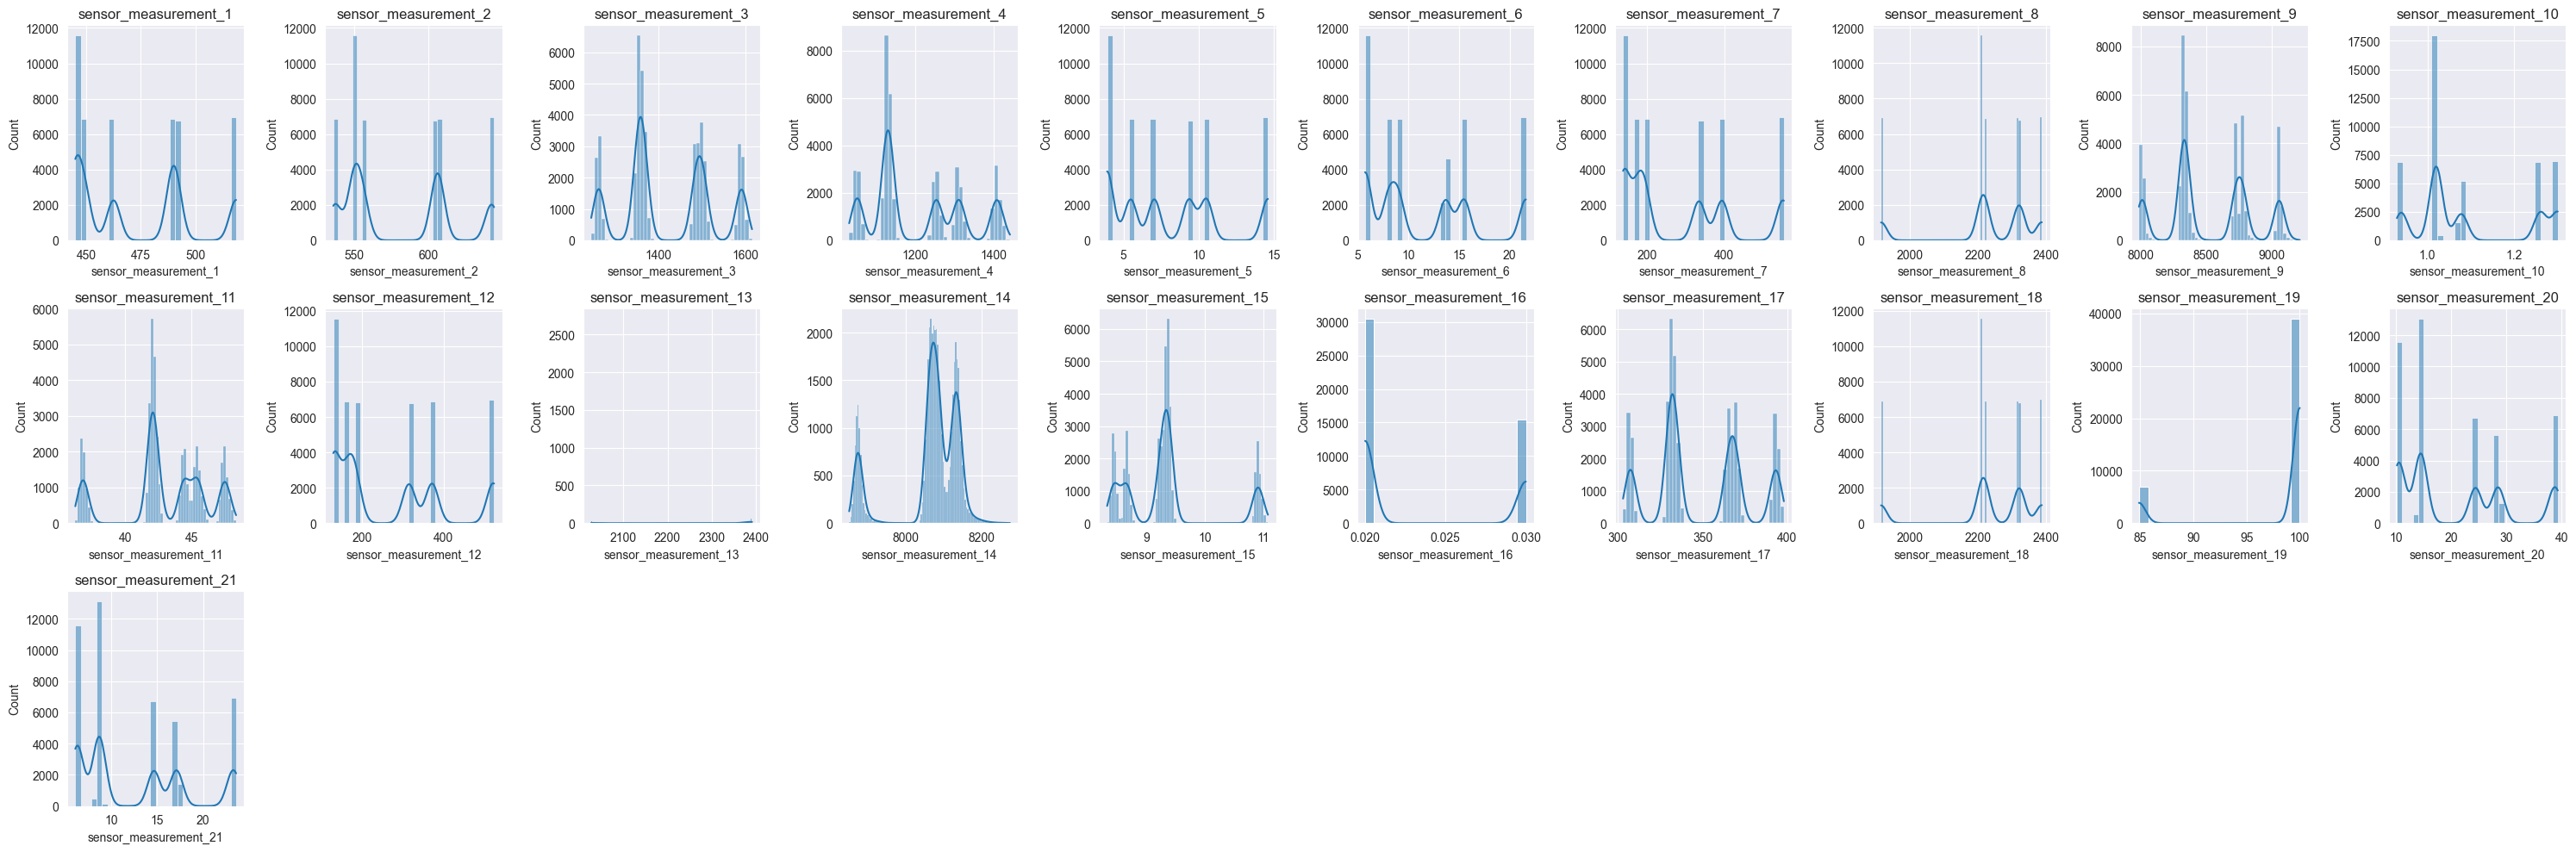

In [31]:
plotDataDistribution(df, sensor_cols)

Sensors such as `sensor_measurement_16` and `sensor_measurement_19` have very tight distributions with insignificant variation, confirming their low informativeness.

Sensors like `sensor_measurement_5` and `sensor_measurement_13` also have discrete distributions with multiple peaks, which may suggest their lesser significance.

Sensors with more normal distributions, such as `sensor_measurement_2`, `sensor_measurement_4`, and `sensor_measurement_8`, are likely to be more useful for prediction.

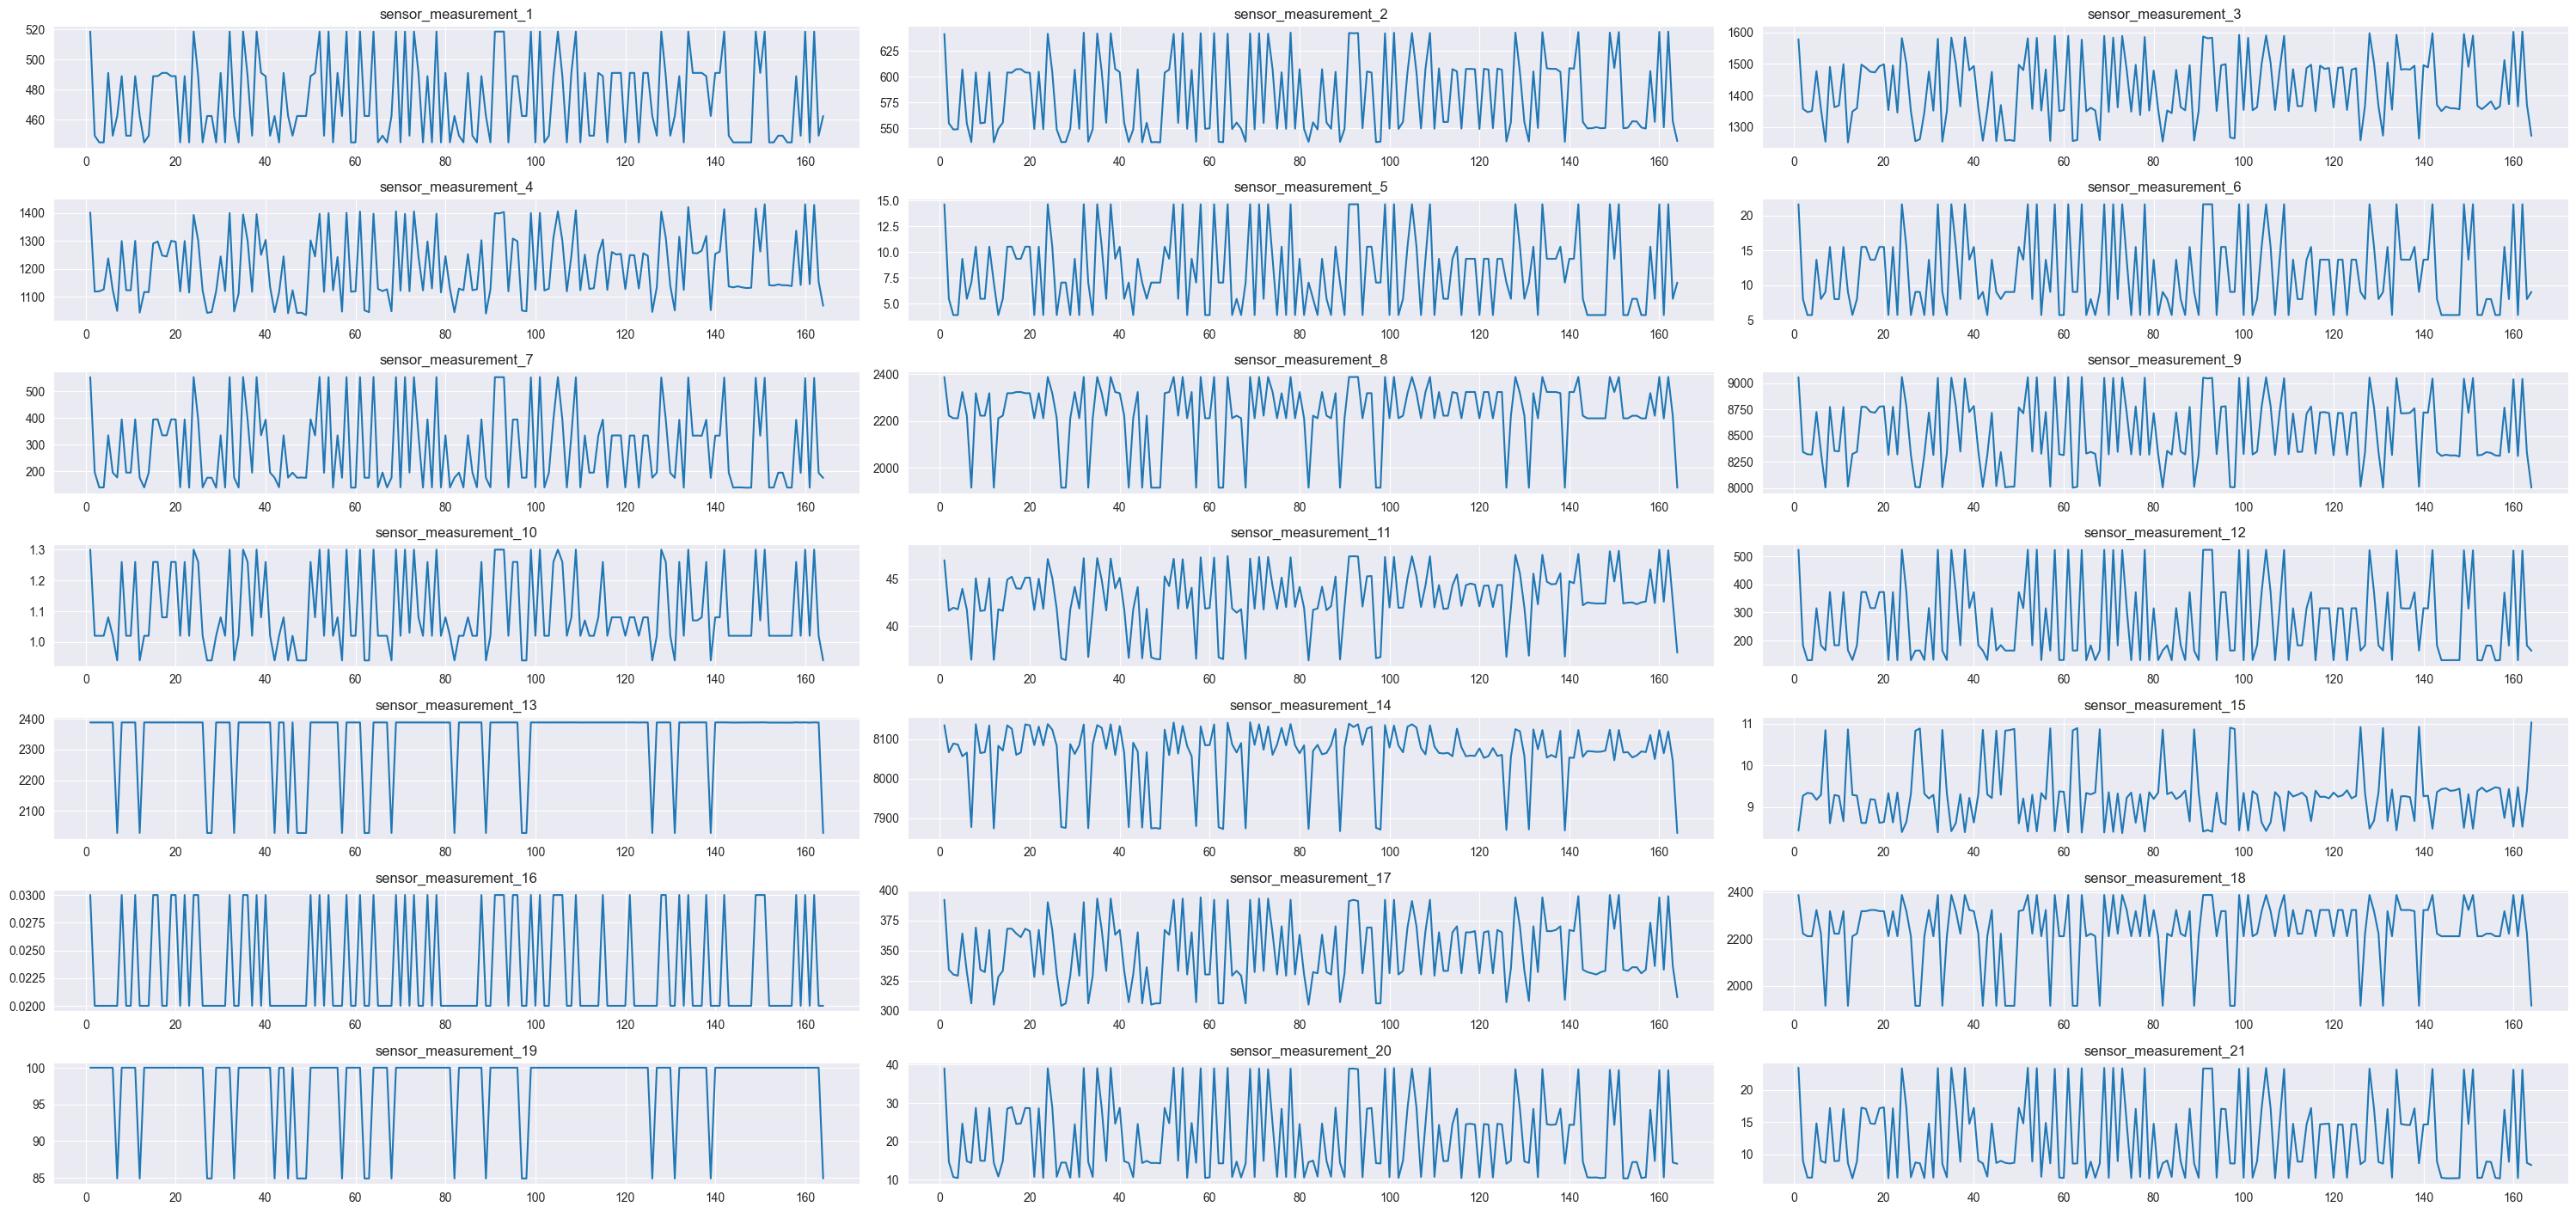

In [32]:
plotSensorDataOfId(df, 2)  # Здесь можно изменить ID двигателя для анализа

In [33]:
# Function to visualize distributions of operational settings
def plot_operational_settings_distributions(df):
    plt.figure(figsize=(12, 6))

    # Operational settings
    operational_settings = ['op_setting_1', 'op_setting_2', 'op_setting_3']

    for i, setting in enumerate(operational_settings, 1):
        plt.subplot(1, 3, i)
        sns.histplot(df[setting], bins=50, kde=True)
        plt.title(f'Distribution of {setting}')
        plt.xlabel(setting)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

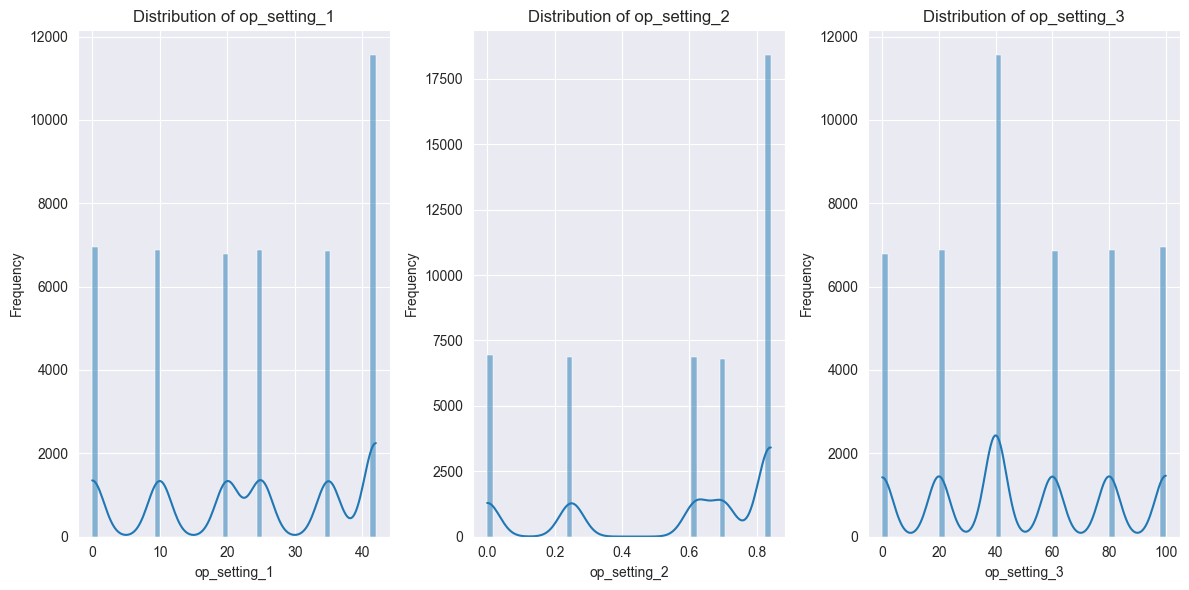

In [34]:
# Visualize distributions of operational settings
plot_operational_settings_distributions(df)

Most sensors have strong correlations with each other, especially in conjunction with operational settings, indicating that sensor data depend on operating modes. We might consider removing some highly correlated sensors—for example, keeping only one of `sensor_measurement_1`, `sensor_measurement_2`, or `sensor_measurement_17`, as they are practically identical. We'll rely on the model's performance results to make more serious decisions about excluding sensors.

Further analysis may require excluding highly correlated sensors to avoid multicollinearity.

Based on the analysis, we can propose excluding the following sensors due to their low informativeness:

- `sensor_measurement_13`
- `sensor_measurement_16`
- `sensor_measurement_19`